# Laser Process Analysis: Identifying Keyhole and Conduction Zones

## Overview
This notebook aims to analyze the optical emission and optical reflection data acquired during a laser process. The data is divided into different conditions, each corresponding to specific laser power and speed settings. The primary objective is to identify the transition speeds that lead to significant changes in the distributions of optical emission and reflection. These transition speeds will provide insights into two distinct operational states: the 'keyhole' and 'conduction' zones.

## Objectives
1. **Data Loading**: Load the optical emission and optical reflection data, along with corresponding parameters like laser power and speed.
2. **Data Exploration**: Explore the basic statistics and visualize the data to understand its characteristics.
3. **Identifying Transition Speeds**: Use statistical measures to find transition speeds at each power level.
4. **State Classification**: Classify the operational states into 'keyhole' and 'conduction' based on identified transition speeds.
5. **Visualizing State Transitions**: Plot the transition speeds and operational states on a Power-Speed plane for easy interpretation.

## Structure
- **Data Loading and Preliminary Checks**: Load the data and perform basic checks on its structure.
- **Initial Data Visualization**: Visualize the distribution of optical emission and reflection for different conditions.
- **Advanced Analysis**: Perform statistical analysis to identify transition speeds and operational states.
- **Final Visualizations**: Create plots to visualize the identified states across different power and speed settings.

## Key Takeaways
By the end of this analysis, we will be able to identify the speeds at which the laser operation transitions between 'keyhole' and 'conduction' states for different power settings, providing valuable insights for optimizing the laser process.



In [1]:
import pandas as pd
import pickle

# Define the cube number
cube = 1

# Load final_data_list
with open(f'./Data/final_data_list_cube_{cube}.pkl', 'rb') as f:
    final_data_list = pickle.load(f)

# Define the path to the Excel file
excel_path = './Parameters.xlsx'  

# Define the page to be used
sheet_name = f"Cube {cube}"

# Try to read the Excel file into a DataFrame
try:
    df_conditions = pd.read_excel(excel_path, sheet_name=sheet_name)
    print("Successfully read the Excel file.")
except Exception as e:
    print(f"An error occurred: {e}")



Successfully read the Excel file.


In [2]:
df_conditions

,Speed (mm/s),Powers (W),Powers perc (%),#
0,1300.000000,20.000000,16.000000,1
1,633.333333,20.000000,16.000000,2
2,300.000000,20.000000,16.000000,3
3,1466.666667,93.333333,18.666667,4
4,800.000000,93.333333,18.666667,5
5,300.000000,93.333333,18.666667,6
6,1466.666667,106.666667,21.333333,7
7,966.666667,106.666667,21.333333,8
8,466.666667,106.666667,21.333333,9
9,1633.333333,120.000000,24.000000,10


In [3]:
import numpy as np

# Checking the dimensions of arrays in final_data_list
array_shapes = [arr.shape for arr in final_data_list]

# Checking the total number of rows and missing values in df_conditions
total_rows_df_conditions = df_conditions.shape[0]
missing_values_df_conditions = df_conditions.isnull().sum()

# Calculating basic statistics for a sample array from final_data_list (taking the first array as a sample)
sample_array = final_data_list[0]
sample_array_stats = {
    'mean': np.mean(sample_array),
    'median': np.median(sample_array),
    'std_dev': np.std(sample_array),
    'min': np.min(sample_array),
    'max': np.max(sample_array),
}

# Calculating basic statistics for the columns in df_conditions
df_conditions_stats = df_conditions.describe()

array_shapes, total_rows_df_conditions, missing_values_df_conditions, sample_array_stats, df_conditions_stats


([(2, 10, 702),
  (2, 10, 1529),
  (2, 10, 3284),
  (2, 10, 633),
  (2, 10, 1201),
  (2, 10, 3285),
  (2, 10, 634),
  (2, 10, 986),
  (2, 10, 2094),
  (2, 10, 566),
  (2, 10, 836),
  (2, 10, 2094),
  (2, 10, 3287),
  (2, 10, 2357),
  (2, 10, 1833),
  (2, 10, 1498),
  (2, 10, 1264),
  (2, 10, 1091),
  (2, 10, 959),
  (2, 10, 854),
  (2, 10, 769),
  (2, 10, 698),
  (2, 10, 640),
  (2, 10, 590),
  (2, 10, 547),
  (2, 10, 508),
  (2, 10, 474),
  (2, 10, 445),
  (2, 10, 417),
  (2, 10, 393),
  (2, 10, 372),
  (2, 10, 352)],
 32,
 Speed (mm/s)       0
 Powers (W)         0
 Powers perc (%)    0
 #                  0
 dtype: int64,
 {'mean': 0.19397475824928778,
  'median': 0.1608276,
  'std_dev': 0.10994237914360615,
  'min': 0.0239563,
  'max': 1.700439},
        Speed (mm/s)  Powers (W)  Powers perc (%)          #
 count     32.000000   32.000000        32.000000  32.000000
 mean    1216.666667  119.375000        25.000000  16.500000
 std      654.573393   36.213599         4.350256   9.38

In [4]:
# Mapping each condition to its corresponding array in final_data_list
condition_to_array_map = {condition: array for condition, array in zip(df_conditions['#'], final_data_list)}

# Calculating basic statistics for all the arrays
sample_condition_numbers = list(range(1, len(final_data_list)))

sample_statistics = {}

for condition_number in sample_condition_numbers:
    sample_array = condition_to_array_map[condition_number]
    sample_statistics[condition_number] = {
        'mean': np.mean(sample_array),
        'median': np.median(sample_array),
        'std_dev': np.std(sample_array),
        'min': np.min(sample_array),
        'max': np.max(sample_array),
    }

sample_statistics


{1: {'mean': 0.19397475824928778,
  'median': 0.1608276,
  'std_dev': 0.10994237914360615,
  'min': 0.0239563,
  'max': 1.700439},
 2: {'mean': 0.2635455784100719,
  'median': 0.201416,
  'std_dev': 0.16435357743805068,
  'min': 0.0189209,
  'max': 3.140411},
 3: {'mean': 0.27197675911240865,
  'median': 0.2061462,
  'std_dev': 0.18769631338607212,
  'min': 0.001983643,
  'max': 4.999847},
 4: {'mean': 0.4528399411233017,
  'median': 0.221405,
  'std_dev': 0.4029352267684603,
  'min': 0.009307861,
  'max': 4.999847},
 5: {'mean': 0.41339656458950874,
  'median': 0.2394104,
  'std_dev': 0.32669835314736617,
  'min': 0.02410889,
  'max': 3.396912},
 6: {'mean': 0.3557968650299848,
  'median': 0.2432251,
  'std_dev': 0.2469376852587072,
  'min': 0.01663208,
  'max': 4.960632},
 7: {'mean': 0.6132967373651419,
  'median': 0.2611542,
  'std_dev': 0.5587910742218923,
  'min': 0.01068115,
  'max': 4.999847},
 8: {'mean': 0.562338791954868,
  'median': 0.27275085,
  'std_dev': 0.48593421630759

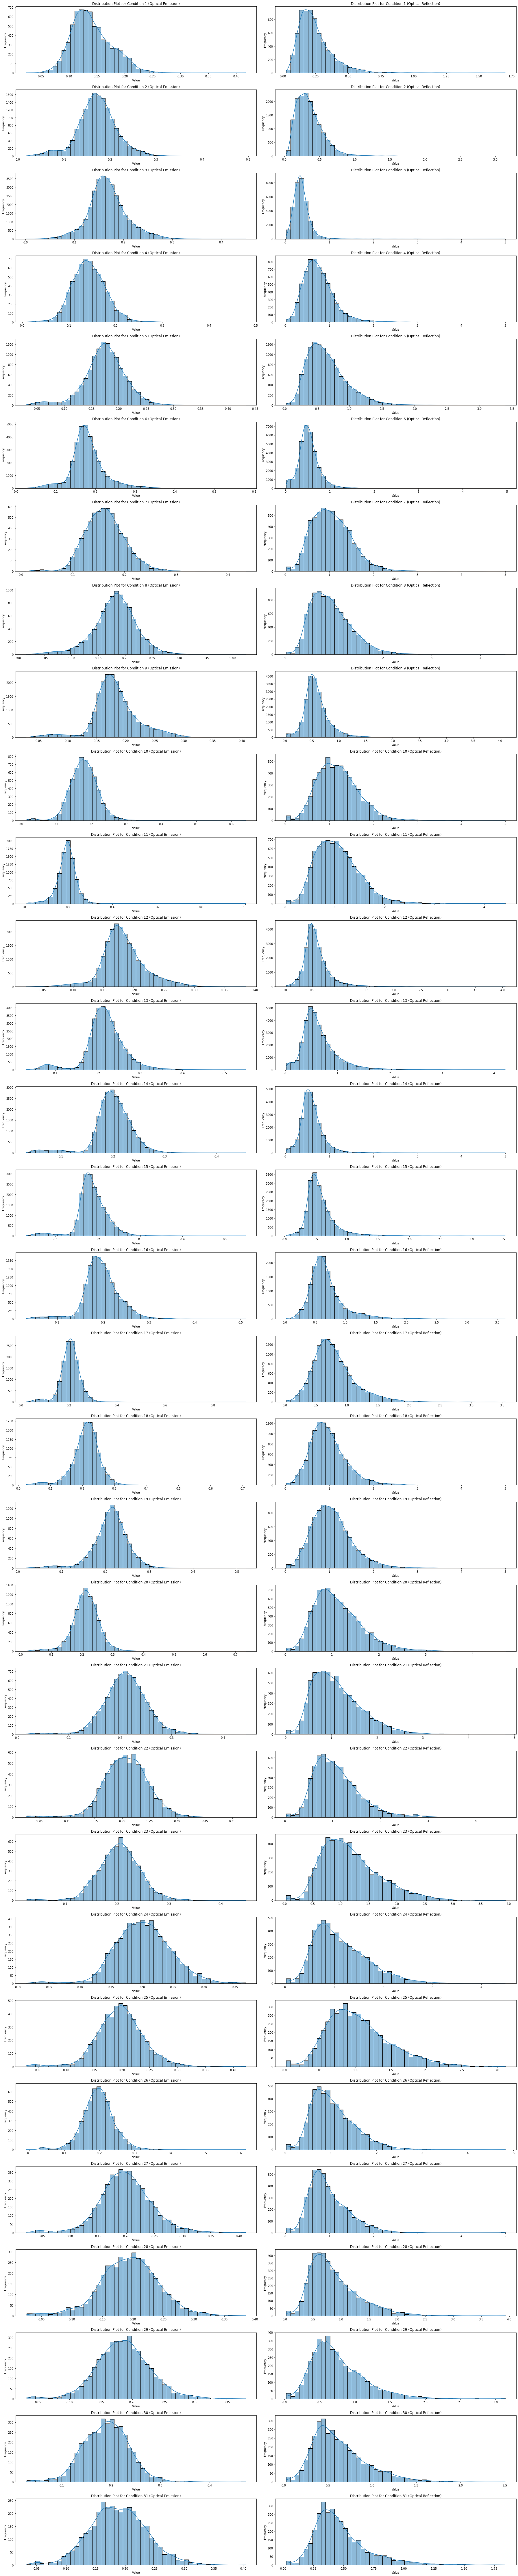

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the matplotlib figure
fig, axes = plt.subplots(len(sample_condition_numbers), 2, figsize=(25, 4*len(sample_condition_numbers)))

# Create channel-specific distribution plots for sample conditions
channels = ['Optical Emission', 'Optical Reflection']

for idx, condition_number in enumerate(sample_condition_numbers):
    sample_array = condition_to_array_map[condition_number]
    
    for channel_idx, channel in enumerate(channels):
        # Select the data for the specific channel
        channel_data = sample_array[channel_idx, :, :].flatten()
        
        sns.histplot(channel_data, bins=50, kde=True, ax=axes[idx, channel_idx])
        axes[idx, channel_idx].set_title(f'Distribution Plot for Condition {condition_number} ({channel})')
        axes[idx, channel_idx].set_xlabel('Value')
        axes[idx, channel_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


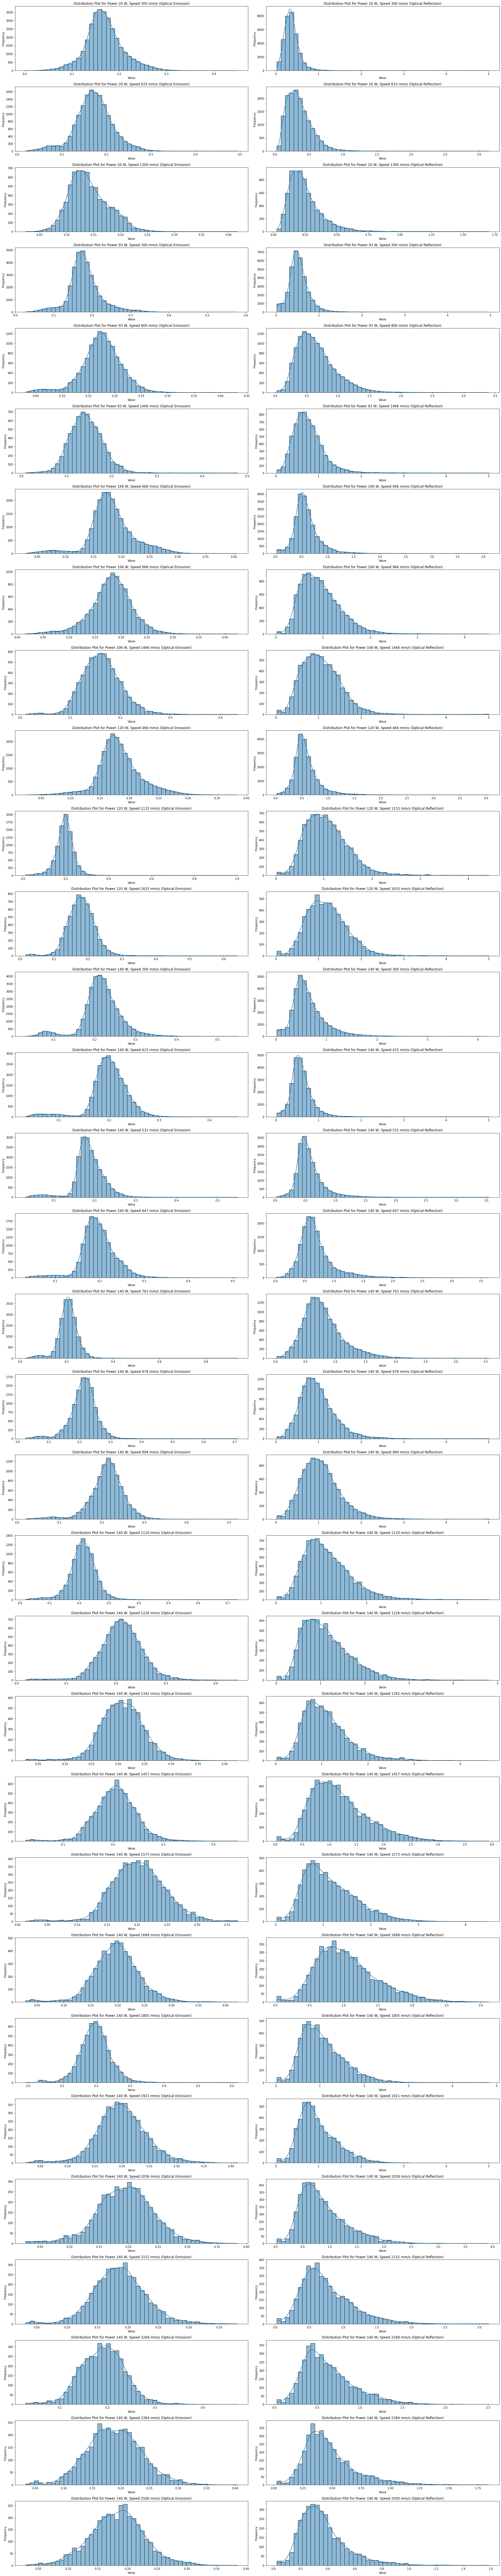

In [6]:
# Sort the conditions first by power and then by speed
sorted_conditions = df_conditions.sort_values(by=['Powers (W)', 'Speed (mm/s)'])['#'].tolist()

# Initialize the figure for visualization
fig, axes = plt.subplots(len(sorted_conditions), 2, figsize=(25, 4*len(sorted_conditions)))

# Create channel-specific distribution plots for sorted conditions
channels = ['Optical Emission', 'Optical Reflection']

for idx, condition_number in enumerate(sorted_conditions):
    sample_array = condition_to_array_map[condition_number]
    power = int(df_conditions[df_conditions['#'] == condition_number]['Powers (W)'].iloc[0])
    speed = int(df_conditions[df_conditions['#'] == condition_number]['Speed (mm/s)'].iloc[0])
    
    for channel_idx, channel in enumerate(channels):
        # Select the data for the specific channel
        channel_data = sample_array[channel_idx, :, :].flatten()
        
        sns.histplot(channel_data, bins=50, kde=True, ax=axes[idx, channel_idx])
        axes[idx, channel_idx].set_title(f'Distribution Plot for Power {power} W, Speed {speed} mm/s ({channel})')
        axes[idx, channel_idx].set_xlabel('Value')
        axes[idx, channel_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
# Identifying conditions with the same power but different speeds
grouped_by_power = df_conditions.groupby('Powers (W)')

# Dictionary to store conditions with the same power but different speeds
conditions_same_power_diff_speed = {}

for power, group in grouped_by_power:
    unique_speeds = group['Speed (mm/s)'].nunique()
    if unique_speeds > 1:
        conditions_same_power_diff_speed[power] = group['#'].tolist()

conditions_same_power_diff_speed


{20.0: [1, 2, 3],
 93.33333333333333: [4, 5, 6],
 106.6666666666667: [7, 8, 9],
 120.0: [10, 11, 12],
 140.0: [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32]}

In [8]:
# Sorting the conditions by speed for each power level
sorted_conditions_by_speed = {power: sorted(conditions, key=lambda x: df_conditions[df_conditions['#'] == x]['Speed (mm/s)'].iloc[0]) for power, conditions in conditions_same_power_diff_speed.items()}

sorted_conditions_by_speed


{20.0: [3, 2, 1],
 93.33333333333333: [6, 5, 4],
 106.6666666666667: [9, 8, 7],
 120.0: [12, 11, 10],
 140.0: [13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32]}

In [9]:
# Initialize dictionaries to store mean and standard deviation results
mean_std_results = {}

# Loop through each power level and its corresponding sorted conditions
for power in sorted_conditions_by_speed.keys():
    mean_std_results[power] = {'Optical Emission': [], 'Optical Reflection': []}
    
    # Loop through each channel
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        conditions = sorted_conditions_by_speed[power]
        
        # Loop through each condition to collect data
        for condition in conditions:
            array_data = condition_to_array_map[condition]
            
            # Trim data to remove last 10% from each line
            array_data_trimmed = array_data[channel_idx, :, :int(array_data.shape[2]*.9)]
            
            # Compute the mean line
            array_mean_line = np.mean(array_data_trimmed, axis=1)
            
            # Find the corresponding speed
            speed = df_conditions[df_conditions['#'] == condition]['Speed (mm/s)'].iloc[0]
            
            # Calculate mean and standard deviation
            mean_value = np.mean(array_mean_line)
            std_value = np.std(array_mean_line)
            
            mean_std_results[power][channel].append((speed, mean_value, std_value))

mean_std_results


{20.0: {'Optical Emission': [(300.0, 0.167148555323621, 0.019555088902574378),
   (633.3333333333333, 0.17211237597093024, 0.016142126797393776),
   (1300.0, 0.14125017516481772, 0.016256505659571735)],
  'Optical Reflection': [(300.0, 0.3907945403434857, 0.04322384791003713),
   (633.3333333333333, 0.37414989950218025, 0.06990336054125684),
   (1300.0, 0.25980719313787637, 0.05089494520079347)]},
 93.33333333333333: {'Optical Emission': [(300.0,
    0.1802655582097429,
    0.025753704218120774),
   (800.0, 0.17368528622499999, 0.009344813848216343),
   (1466.666666666667, 0.1423597556486819, 0.006724389442321132)],
  'Optical Reflection': [(300.0, 0.535119445041272, 0.05432487297084058),
   (800.0, 0.6786100611749999, 0.08160203239333409),
   (1466.666666666667, 0.7902516416520211, 0.059909946139841186)]},
 106.6666666666667: {'Optical Emission': [(466.6666666666666,
    0.18118635239861997,
    0.023279310683459283),
   (966.6666666666666, 0.18141994943517475, 0.010723653174012469),


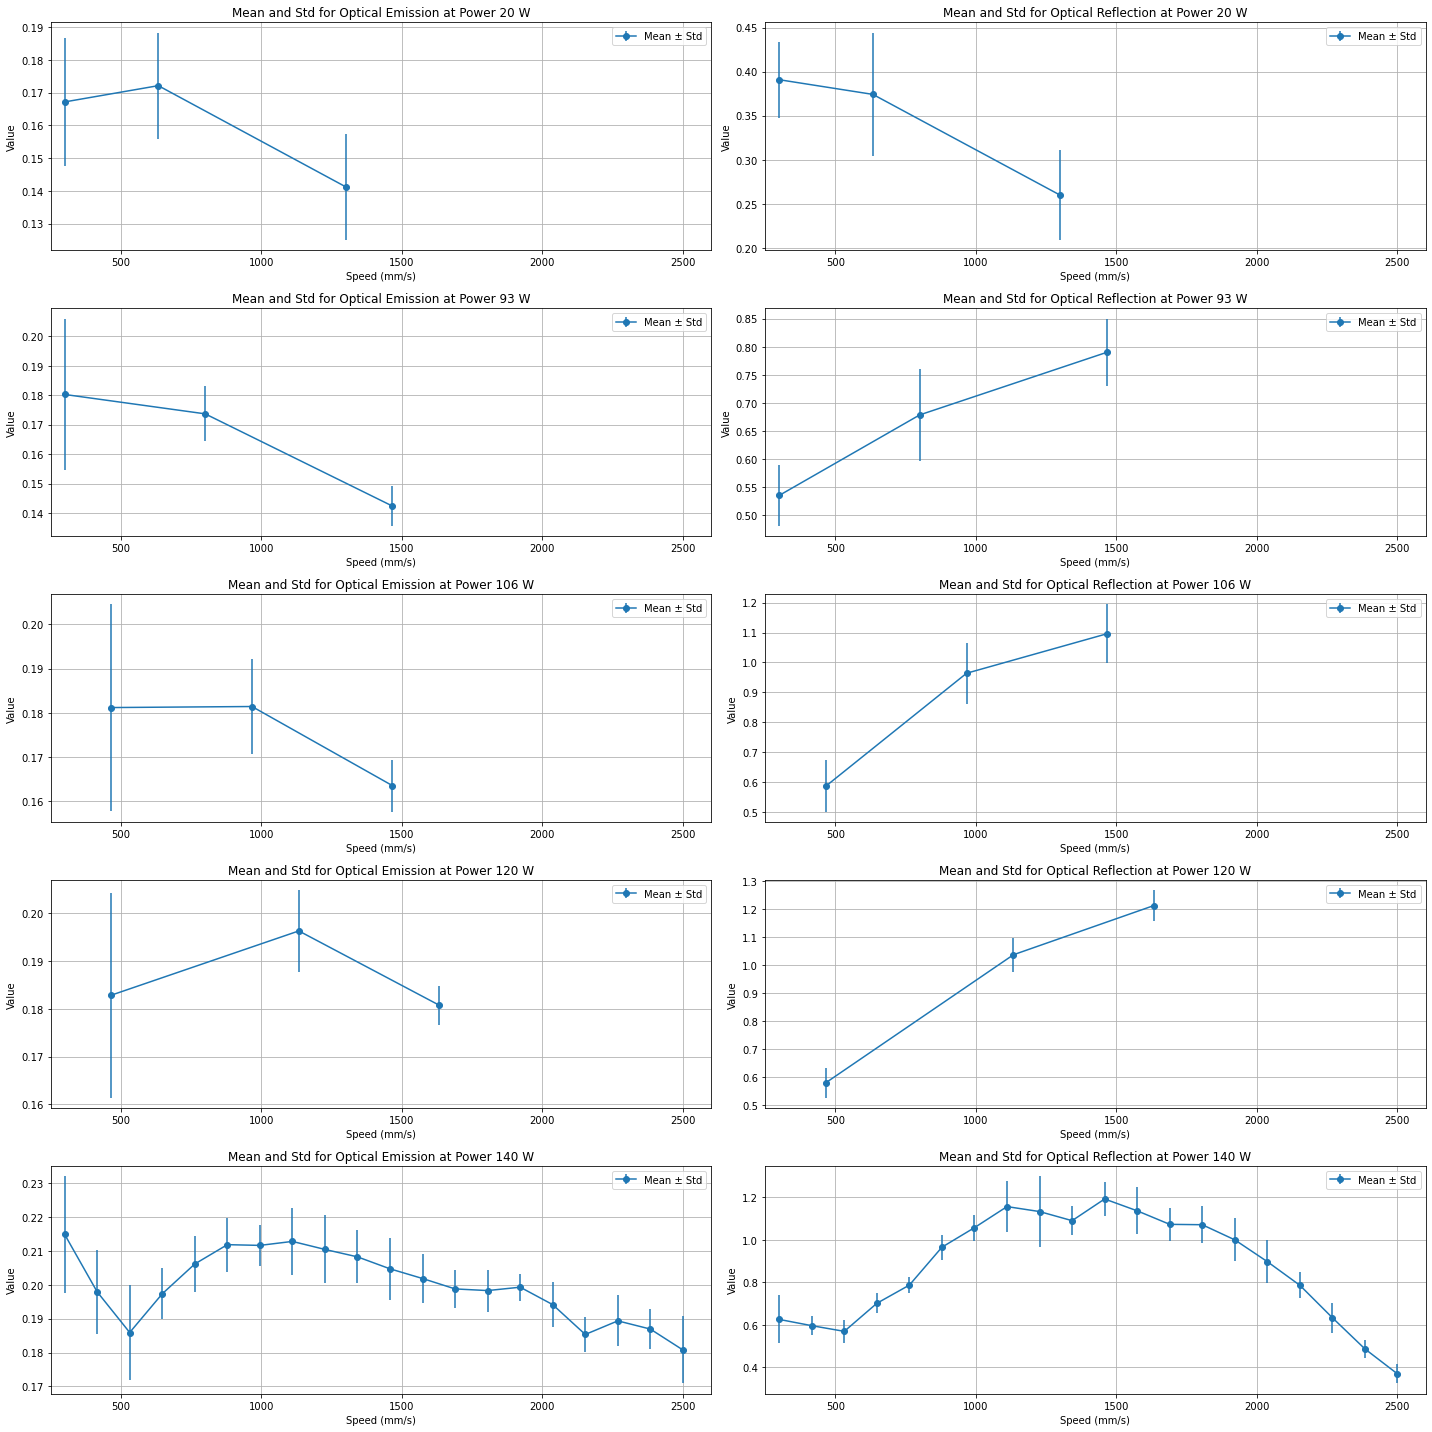

In [10]:
# Initialize the figure for visualization
fig, axes = plt.subplots(len(mean_std_results), 2, figsize=(20, 4*len(mean_std_results)))

# Loop through each power level and its corresponding mean and std results
for idx, (power, mean_std_channel) in enumerate(mean_std_results.items()):
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        mean_std_data = mean_std_channel[channel]
        speeds = [speed for speed, _, _ in mean_std_data]
        means = [mean for _, mean, _ in mean_std_data]
        stds = [std for _, _, std in mean_std_data]
        
        # Generate the error bar plot
        axes[idx, channel_idx].errorbar(speeds, means, yerr=stds, fmt='o-', label='Mean ± Std')
        axes[idx, channel_idx].set_title(f'Mean and Std for {channel} at Power {int(power)} W')
        axes[idx, channel_idx].set_xlabel('Speed (mm/s)')
        axes[idx, channel_idx].set_ylabel('Value')
        axes[idx, channel_idx].set_xlim([250, 2600])
        axes[idx, channel_idx].legend()
        axes[idx, channel_idx].grid()

plt.tight_layout()
plt.show()


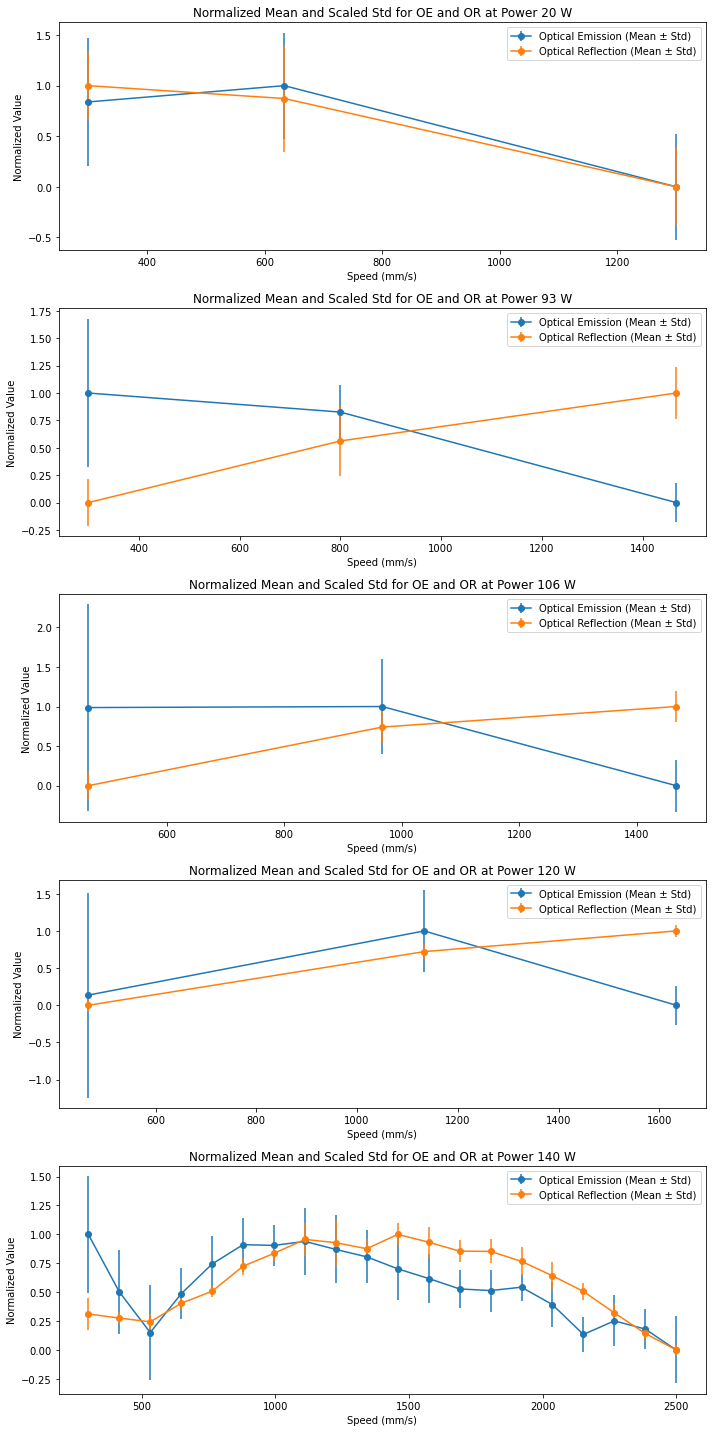

In [11]:
# Initialize the figure for visualization
fig, axes = plt.subplots(len(mean_std_results), 1, figsize=(10, 4*len(mean_std_results)))

# Loop through each power level and its corresponding mean and std results
for idx, (power, mean_std_channel) in enumerate(mean_std_results.items()):
    ax = axes[idx]
    
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        mean_std_data = mean_std_channel[channel]
        speeds = [speed for speed, _, _ in mean_std_data]
        means = np.array([mean for _, mean, _ in mean_std_data])
        stds = np.array([std for _, _, std in mean_std_data])
        
        # Normalize the means between 0 and 1
        min_mean, max_mean = np.min(means), np.max(means)
        normalized_means = (means - min_mean) / (max_mean - min_mean)
        
        # Scale the stds based on the normalized means
        scale_factor = max_mean - min_mean
        scaled_stds = stds / scale_factor
        
        # Generate the error bar plot
        ax.errorbar(speeds, normalized_means, yerr=scaled_stds, fmt='o-', label=f'{channel} (Mean ± Std)')
    
    ax.set_title(f'Normalized Mean and Scaled Std for OE and OR at Power {int(power)} W')
    ax.set_xlabel('Speed (mm/s)')
    ax.set_ylabel('Normalized Value')
    ax.legend()

plt.tight_layout()
plt.show()


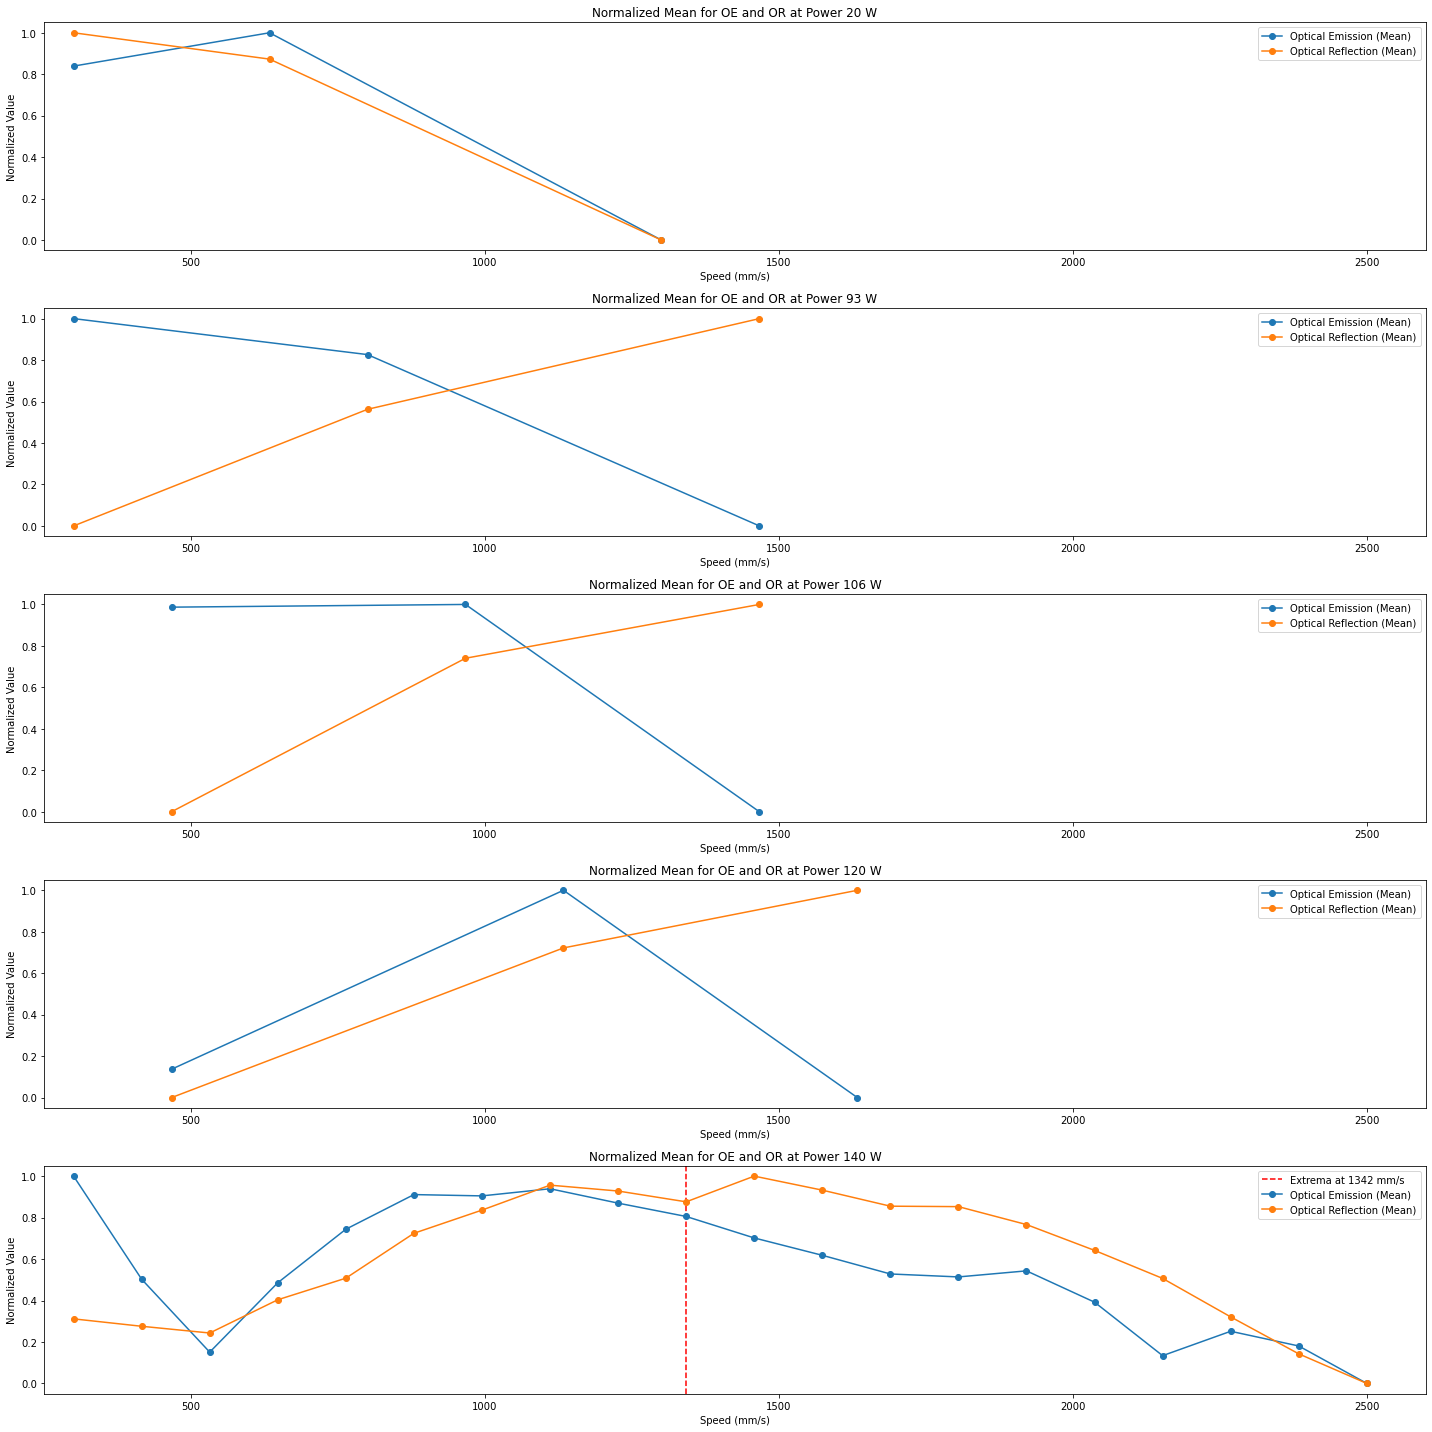

In [12]:
from scipy.signal import find_peaks

# Initialize the figure for visualization
fig, axes = plt.subplots(len(mean_std_results), 1, figsize=(20, 4*len(mean_std_results)))

# Loop through each power level and its corresponding mean and std results
for idx, (power, mean_std_channel) in enumerate(mean_std_results.items()):
    ax = axes[idx]
    
    oe_data = mean_std_channel['Optical Emission']
    or_data = mean_std_channel['Optical Reflection']
    
    # Speeds should be the same for OE and OR, so we take it from one of them
    speeds = np.array([speed for speed, _, _ in oe_data])
    
    # Extract and normalize means for OE and OR
    oe_means = np.array([mean for _, mean, _ in oe_data])
    or_means = np.array([mean for _, mean, _ in or_data])
    
    min_oe, max_oe = np.min(oe_means), np.max(oe_means)
    min_or, max_or = np.min(or_means), np.max(or_means)
    
    normalized_oe_means = (oe_means - min_oe) / (max_oe - min_oe)
    normalized_or_means = (or_means - min_or) / (max_or - min_or)
    
    # Find local maxima for OE and local minima for OR
    oe_peaks, _ = find_peaks(normalized_oe_means)
    or_peaks, _ = find_peaks(-normalized_or_means)  # Invert to find local minima
    
    # Find speeds where OE has local maxima and OR has local minima
    common_speeds = np.intersect1d(speeds[oe_peaks], speeds[or_peaks])
    
    # Choose the speed according to the rules provided
    if len(common_speeds) > 0:
        selected_speed = common_speeds[-1]  # Choose the one on the right (higher speed)
    elif len(or_peaks) > 0:  # Check if or_peaks is not empty
        selected_speed = speeds[or_peaks[-1]]  # Choose the local min in OR furthest on the right as fallback
    else:
        selected_speed = None  # Set to None if or_peaks is empty, or add another fallback value
    
    # Plot the data
    ax.errorbar(speeds, normalized_oe_means, fmt='o-', label='Optical Emission (Mean)')
    ax.errorbar(speeds, normalized_or_means, fmt='o-', label='Optical Reflection (Mean)')
    
    # Highlight the selected speed, if available
    if selected_speed is not None:
        ax.axvline(x=selected_speed, color='r', linestyle='--', label=f'Extrema at {int(selected_speed)} mm/s')
    
    ax.set_title(f'Normalized Mean for OE and OR at Power {int(power)} W')
    ax.set_xlabel('Speed (mm/s)')
    ax.set_ylabel('Normalized Value')
    ax.set_xlim([250, 2600])
    ax.legend()

plt.tight_layout()
plt.show()


In [13]:
# Initialize lists to store power, speed, and color information
power_list = []
speed_list = []
color_list = []

# Create placeholder lists for legend labels
legend_keyhole = []
legend_conduction = []

# Loop through each power level and its corresponding mean and std results
for power, mean_std_channel in mean_std_results.items():
    oe_data = mean_std_channel['Optical Emission']
    or_data = mean_std_channel['Optical Reflection']
    
    # Speeds should be the same for OE and OR, so we take it from one of them
    speeds = np.array([speed for speed, _, _ in oe_data])
    
    # Extract and normalize means for OE and OR
    oe_means = np.array([mean for _, mean, _ in oe_data])
    or_means = np.array([mean for _, mean, _ in or_data])
    
    min_oe, max_oe = np.min(oe_means), np.max(oe_means)
    min_or, max_or = np.min(or_means), np.max(or_means)
    
    normalized_oe_means = (oe_means - min_oe) / (max_oe - min_oe)
    normalized_or_means = (or_means - min_or) / (max_or - min_or)
    
    # Find local maxima for OE and local minima for OR
    oe_peaks, _ = find_peaks(normalized_oe_means)
    or_peaks, _ = find_peaks(-normalized_or_means)  # Invert to find local minima
    
    # Find common speeds where OE has local maxima and OR has local minima
    common_speeds = np.intersect1d(speeds[oe_peaks], speeds[or_peaks])
    
    # Choose the speed according to the rules provided
    if len(common_speeds) > 0:
        selected_speed = common_speeds[-1]  # Choose the one on the right (higher speed)
    else:
        selected_speed = speeds[or_peaks[-1]]  # Choose the local min in OR furthest on the right as fallback
 
    # Prepare data for scatter plot
    for speed in speeds:
        power_list.append(power)
        speed_list.append(speed)
        if speed > selected_speed:
            color_list.append('g')  # Green for "conduction"
            legend_conduction.append('Conduction')
        else:
            color_list.append('r')  # Red for "keyhole"
            legend_keyhole.append('Keyhole')

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(power_list, speed_list, c=color_list)

# Create a proper legend
legend_labels = {'Conduction': 'g', 'Keyhole': 'r'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.values()]
plt.legend(handles, legend_labels.keys(), title='State')

plt.title('Power-Speed Plane')
plt.xlabel('Power (W)')
plt.ylabel('Speed (mm/s)')
plt.show()


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
# Identifying conditions with the same power but different speeds
grouped_by_power = df_conditions.groupby('Powers (W)')

# Dictionary to store conditions with the same power but different speeds
conditions_same_power_diff_speed = {}

for power, group in grouped_by_power:
    unique_speeds = group['Speed (mm/s)'].nunique()
    if unique_speeds > 1:
        conditions_same_power_diff_speed[power] = group['#'].tolist()

conditions_same_power_diff_speed


In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(len(conditions_same_power_diff_speed) * 2, 1, figsize=(15, 40))
plot_idx = 0

# Loop through each power level and its corresponding conditions
for power, conditions in conditions_same_power_diff_speed.items():
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        # Initialize a DataFrame to hold all data for this plot
        plot_data = pd.DataFrame()
        
        # Loop through each condition to collect data
        for condition in conditions:
            array_data = condition_to_array_map[condition][channel_idx, :, :].flatten()
            condition_data = pd.DataFrame({
                'Value': array_data,
                'Speed': int(df_conditions[df_conditions['#'] == condition]['Speed (mm/s)'].iloc[0]),
            })
            plot_data = pd.concat([plot_data, condition_data], ignore_index=True)
        
        # Generate the plot
        sns.histplot(data=plot_data, x='Value', hue='Speed', element='step', stat='density', common_norm=False, ax=axes[plot_idx])
        axes[plot_idx].set_title(f'Distribution Plot for {channel} at Power {power} W')
        axes[plot_idx].set_xlabel('Value')
        axes[plot_idx].set_ylabel('Density')
        plot_idx += 1

plt.tight_layout()
plt.show()


In [ ]:
# Sorting the conditions by speed for each power level
sorted_conditions_by_speed = {power: sorted(conditions, key=lambda x: df_conditions[df_conditions['#'] == x]['Speed (mm/s)'].iloc[0]) for power, conditions in conditions_same_power_diff_speed.items()}

sorted_conditions_by_speed


In [ ]:
# Initialize the figure for 3D plots
fig = plt.figure(figsize=(20, 40))

# Loop through each power level and its corresponding sorted conditions
plot_idx = 1
for power, conditions in sorted_conditions_by_speed.items():
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        ax = fig.add_subplot(len(sorted_conditions_by_speed) * 2, 1, plot_idx, projection='3d')
        
        # Loop through each sorted condition to collect and plot data
        for condition in conditions:
            array_data = condition_to_array_map[condition][channel_idx, :, :].flatten()
            speed = df_conditions[df_conditions['#'] == condition]['Speed (mm/s)'].iloc[0]
            
            # Generate histogram data for the current condition
            hist, bins = np.histogram(array_data, bins=50, density=True)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])
            
            # Plot the histogram as a 3D bar plot
            ax.bar(bin_centers, hist, width=0.05, zs=speed, zdir='y', alpha=0.7)
        
        ax.set_title(f'3D Distribution Plot for {channel} at Power {power} W')
        ax.set_xlabel('Value')
        ax.set_ylabel('Speed (mm/s)')
        ax.set_zlabel('Density')
        plot_idx += 1

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import entropy

# Dictionary to store KL divergence results
kl_divergence_results = {}

# Loop through each power level and its corresponding sorted conditions
for power, conditions in sorted_conditions_by_speed.items():
    kl_divergence_results[power] = {'Optical Emission': [], 'Optical Reflection': []}
    
    # Loop through each channel
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        # Loop through each pair of consecutive sorted conditions to calculate KL divergence
        for i in range(len(conditions) - 1):
            condition1 = conditions[i]
            condition2 = conditions[i + 1]
            
            array_data1 = condition_to_array_map[condition1][channel_idx, :, :].flatten()
            array_data2 = condition_to_array_map[condition2][channel_idx, :, :].flatten()
            
            # Generate histogram data for the current condition pair
            hist1, bins1 = np.histogram(array_data1, bins=50, density=True)
            hist2, bins2 = np.histogram(array_data2, bins=50, density=True)
            
            # Add a small constant to avoid division by zero in KL divergence calculation
            hist1 += 1e-8
            hist2 += 1e-8
            
            # Normalize histograms to make them proper probability distributions
            hist1 /= np.sum(hist1)
            hist2 /= np.sum(hist2)
            
            # Calculate KL divergence
            kl_div = entropy(hist1, hist2)
            
            kl_divergence_results[power][channel].append((condition1, condition2, kl_div))

kl_divergence_results


In [ ]:
# Initialize the figure for visualization
fig, axes = plt.subplots(len(kl_divergence_results), 2, figsize=(20, 40))

# Loop through each power level and its corresponding KL divergence results
for idx, (power, kl_results) in enumerate(kl_divergence_results.items()):
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        kl_data = kl_results[channel]
        speeds = [f"{int(df_conditions[df_conditions['#'] == condition1]['Speed (mm/s)'].iloc[0])}-{int(df_conditions[df_conditions['#'] == condition2]['Speed (mm/s)'].iloc[0])}" for condition1, condition2, _ in kl_data]
        kl_values = [kl for _, _, kl in kl_data]
        
        # Generate the plot
        sns.barplot(x=speeds, y=kl_values, ax=axes[idx, channel_idx])
        axes[idx, channel_idx].set_title(f'KL Divergence for {channel} at Power {power} W')
        axes[idx, channel_idx].set_xlabel('Speed Transition (mm/s)')
        axes[idx, channel_idx].set_ylabel('KL Divergence')
        axes[idx, channel_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Identifying conditions with the same speed but different powers
grouped_by_speed = df_conditions.groupby('Speed (mm/s)')

# Dictionary to store conditions with the same speed but different powers
conditions_same_speed_diff_power = {}

for speed, group in grouped_by_speed:
    unique_powers = group['Powers (W)'].nunique()
    if unique_powers > 1:
        conditions_same_speed_diff_power[speed] = group['#'].tolist()

conditions_same_speed_diff_power


In [ ]:
# Sort conditions by power for each speed level
sorted_conditions_by_power = {speed: sorted(conditions, key=lambda x: df_conditions[df_conditions['#'] == x]['Powers (W)'].iloc[0]) for speed, conditions in conditions_same_speed_diff_power.items()}

# Initialize the figure for 3D plots
fig = plt.figure(figsize=(20, 40))

# Loop through each speed level and its corresponding sorted conditions
plot_idx = 1
for speed, conditions in sorted_conditions_by_power.items():
    for channel_idx, channel in enumerate(['Optical Emission', 'Optical Reflection']):
        ax = fig.add_subplot(len(sorted_conditions_by_power) * 2, 1, plot_idx, projection='3d')
        
        # Loop through each sorted condition to collect and plot data
        for condition in conditions:
            array_data = condition_to_array_map[condition][channel_idx, :, :].flatten()
            power = df_conditions[df_conditions['#'] == condition]['Powers (W)'].iloc[0]
            
            # Generate histogram data for the current condition
            hist, bins = np.histogram(array_data, bins=50, density=True)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])
            
            # Plot the histogram as a 3D bar plot
            ax.bar(bin_centers, hist, width=0.05, zs=power, zdir='y', alpha=0.7)
        
        ax.set_title(f'3D Distribution Plot for {channel} at Speed {speed} mm/s')
        ax.set_xlabel('Value')
        ax.set_ylabel('Power (W)')
        ax.set_zlabel('Density')
        plot_idx += 1

plt.tight_layout()
plt.show()
